# Best Sub-District to Build an Apartment  
Welcome to this notebook. In this notebook, I'll try to find the best sub-district to build an apartment in Bandung City, Indonesia. But before that, let's talk about the problem.

## 1. Introduction  
Bandung is one of the most populous city in Indonesia, with <b>2.575 million population</b> and <b>15,342 people per square kilometer</b>. The area of this city is 167.7 square kilometers [1]. And fortunately, with such a high population density, the quality of residence in Bandung City also becomes better over time, according to Public Relations of Bandung City. If the quality of residence becomes better, why would I choose this city then? Well, simply because this is where I live since I was born. And it's interesting to analyze which is the current best place to build an apartment in my homeland.  

Despite the quality of residence becomes better, Bandung City has a very high population growth over time. It is predicted to reach <b>3 million population</b> on the future 10 years [2]. Would you agree that Bandung would need a better and more residence when the population gets that high? Then what do you think this city should build to suppress this problem? In my opinion, when it comes to a population to land size proportion, an apartment would be the best, as it uses much smaller land size than the others such as housing. But, build an apartment isn't easy. We need to consider which is the best place to build it, how many facilities would be available near that place, how hard it is to build it in that place, and so many more to consider.  

For this time, I'll choose what venues available on that sub-district such as malls, schools, facilities, and the others. The final insight I'll give <b>wouldn't be the exact location</b>, but the best sub-district to build an apartment. <b>REMEMBER</b>, this insight is only for fun with considering only a few variables, and not the others such as the land available on that sub-district or the government's permission. <b>I WILL BE NOT RESPONSIBLE ON ANYTHING IF SOMETHING HAPPENED WHEN YOU FOLLOW THIS ADVICE</b>.

## 2. Data Description  
With all those problems to be considered above, we need the data as below :  
 - Foursquare API to get the information of venues location (facilities , malls, and schools, and the others) [3].  
 - I found the data from the Open Data Bandung City about the population density on each sub-district [4].  
 - I use DistancesFrom to find the center on each sub-district [5]

## 3. Methodology  
Before we do the analysis, we need to get some data from OpenData Bandung City to get the population density and DistancesFrom to get each sub-district coordinate location.

### 3.1 Get some data  
For the initial dataset, I use people density data on each sub-district from Open Data Bandung City

In [1]:
# dataframe imported through IBM Watson Studio
df = pd.read_csv(body)
df.head()

,Nama Kecamatan,Jumlah Penduduk,Luas Wilayah (ha),Kepadatan (jiwa/ha)
0,Andir,99156,422,235
1,Antapani,78047,422,185
2,Arcamanik,75609,759,100
3,Astana Anyar,73991,268,276
4,Babakan Ciparay,137689,707,195


From the above dataset, I'll take "Nama Kecamatan" column as the name of the sub-district and "Kepadatan (jiwa/ha)" column which is the population density on each sub-district in hectare format.

In [2]:
df = df[['Nama Kecamatan','Kepadatan (jiwa/ha)']]
df.head()

,Nama Kecamatan,Kepadatan (jiwa/ha)
0,Andir,235
1,Antapani,185
2,Arcamanik,100
3,Astana Anyar,276
4,Babakan Ciparay,195


Let's rename the column names into english so we all can understand what the column is

In [3]:
df.columns = ['Sub-district Name','Density (Population/ha)']
df.head()

,Sub-district Name,Density (Population/ha)
0,Andir,235
1,Antapani,185
2,Arcamanik,100
3,Astana Anyar,276
4,Babakan Ciparay,195


I searched the center point coordiante on each sub-district using DistancesFrom. I did it manually, and put it into excel file

In [4]:
# dataframe imported through IBM Watson Studio
df_coordinate = pd.read_excel(body)
df_coordinate.head()

,Sub-district,Latitude,Longitude
0,Andir,-6.911400,107.577100
1,Antapani,-6.918600,107.660000
2,Arcamanik,-6.917900,107.677800
3,Astana Anyar,-6.929900,107.599300
4,Babakan Ciparay,-6.942333,107.577144


Now I merge both dataframe so it is ready to be processed

In [5]:
df_merged = pd.merge(df,df_coordinate,left_on='Sub-district Name',right_on='Sub-district')
df_merged.drop('Sub-district',axis=1,inplace=True)
df_merged.head()

,Sub-district Name,Density (Population/ha),Latitude,Longitude
0,Andir,235,-6.911400,107.577100
1,Antapani,185,-6.918600,107.660000
2,Arcamanik,100,-6.917900,107.677800
3,Astana Anyar,276,-6.929900,107.599300
4,Babakan Ciparay,195,-6.942333,107.577144


Next, I'm going to get some venues data from Foursquare API

In [6]:
# Cell 

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    import requests
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        except:
            print("An exception occurred")    

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sub-district Name', 
                  'Sub-district Latitude', 
                  'Sub-district Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
venues = getNearbyVenues(names=df_merged['Sub-district Name'],
                        latitudes=df_merged['Latitude'],
                        longitudes=df_merged['Longitude'],
                        radius=750)
print(venues.shape)
venues.head()

(719, 7)


,Sub-district Name,Sub-district Latitude,Sub-district Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andir,-6.9114,107.5771,Noah's Barn Coffeenery,-6.914821,107.577483,Coffee Shop
1,Andir,-6.9114,107.5771,West Point Hotel,-6.912569,107.577947,Hotel
2,Andir,-6.9114,107.5771,Yellow Truck Coffee & Tea Co,-6.911830,107.577932,Coffee Shop
3,Andir,-6.9114,107.5771,Lighthouse Coffee Brewery,-6.913156,107.574992,Coffee Shop
4,Andir,-6.9114,107.5771,Super Indo,-6.913519,107.575448,Supermarket


In [9]:
venues['Venue Category'].unique() #List of venue category on the venues dataframe

array(['Coffee Shop', 'Hotel', 'Supermarket', 'Snack Place',
       'Chinese Restaurant', 'Cupcake Shop', 'Convenience Store',
       'Indonesian Restaurant', 'Bakery', 'Internet Cafe', 'Pharmacy',
       'Noodle House', 'Spa', 'Indonesian Meatball Place',
       'Grocery Store', 'Breakfast Spot', 'Field', 'Salon / Barbershop',
       'Food Truck', 'Dance Studio', 'Movie Theater', 'Department Store',
       'Cosmetics Shop', 'Restaurant', 'Café', 'Asian Restaurant',
       'Sundanese Restaurant', 'Flea Market', 'Automotive Shop',
       'Clothing Store', 'Food & Drink Shop', 'Jewelry Store', 'Arcade',
       'Photography Lab', 'Furniture / Home Store', 'Pet Store',
       'Bus Station', 'Ice Cream Shop', 'High School',
       'Javanese Restaurant', 'Baseball Field', 'BBQ Joint', 'Market',
       'Art Gallery', 'Camera Store', 'Steakhouse', 'Pastry Shop',
       'Community Center', 'Bed & Breakfast', 'Music School',
       'Sushi Restaurant', 'Bistro', 'Frozen Yogurt Shop', 'Kids Store'

Getting the venues data completed. Now let's eliminate some unimportant venue category for an apartment, such as Hotel

In [10]:
filtered_venues = venues[venues['Venue Category'] != 'Hotel']
filtered_venues.shape

(669, 7)

Now we got the venue dataset on each sub-district. Please note that the maximum number of venues in each sub-district is 100, as it is the limit given from Foursquare API. I changed the limit to 200, but it still returned to only 100 venues. So let's go to the next step now

### 3.2 Analysis  
Now we get the population density data and venues data. Here are the steps I'm going to do to choose the best sub-district :  
1. Take the 10 highest population density from each sub-district. Our objective is to increase the quality of residence (by building an apartment) from the population density problem. These sub-district would be our candidate to become our best choice to build an apartment  
2. From those 10 highest population density, let's see the amount on of category venues on each sub-district to get more information about the distribution  
3. Get the 10 most common venues on each of those sub-district. Eliminate that sub-district if there's no value on the 10 most common venue column

In [11]:
!pip install folium

In [12]:
import folium
bandung_lat = -6.9175
bandung_lon = 107.64
# create map of Bandung using latitude and longitude values
map = folium.Map(location=[bandung_lat, bandung_lon], zoom_start=13)

# add markers to map
for lat, lng, sub_district in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Sub-district Name']):
    label = '{}'.format(sub_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

Now you might be thinking why would I use the center of each sub-district and not an area of that sub-district. Well because it's currently impossible for now as I don't have the JSON File for each area of the sub-district or a choropleth map. That's why I choose the center point for each district, and then find the venues within a specific radius.  
Okay, the next step is taking the 10 highest population density

#### 3.2.1 Take the 10 highest population density from each sub-district

In [13]:
df_merged = df_merged.sort_values(by='Density (Population/ha)',ascending=False).head(10)
df_merged.head(10)

,Sub-district Name,Density (Population/ha),Latitude,Longitude
9,Bojongloa Kaler,395,-6.931600,107.589000
3,Astana Anyar,276,-6.929900,107.599300
13,Cibeunying Kidul,271,-6.898446,107.648168
8,Batununggal,250,-6.919500,107.636300
0,Andir,235,-6.911400,107.577100
20,Kiaracondong,223,-6.924100,107.648100
4,Babakan Ciparay,195,-6.942333,107.577144
26,Sukajadi,192,-6.890400,107.589000
6,Bandung Kulon,191,-6.937600,107.565300
1,Antapani,185,-6.918600,107.660000


Those are the 10 sub-district with the highest population density. From now on, we will only focus on these sub-district. Let's eliminate venues not available on these sub-district

In [14]:
filtered_venues = filtered_venues[filtered_venues['Sub-district Name'].isin(df_merged['Sub-district Name'])]
print(filtered_venues.shape)
filtered_venues.head()

(188, 7)


,Sub-district Name,Sub-district Latitude,Sub-district Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andir,-6.9114,107.5771,Noah's Barn Coffeenery,-6.914821,107.577483,Coffee Shop
2,Andir,-6.9114,107.5771,Yellow Truck Coffee & Tea Co,-6.911830,107.577932,Coffee Shop
3,Andir,-6.9114,107.5771,Lighthouse Coffee Brewery,-6.913156,107.574992,Coffee Shop
4,Andir,-6.9114,107.5771,Super Indo,-6.913519,107.575448,Supermarket
5,Andir,-6.9114,107.5771,Kue Balok Kang Didin,-6.907631,107.582487,Snack Place


#### 3.2.2 Getting more information about the venue category distribution

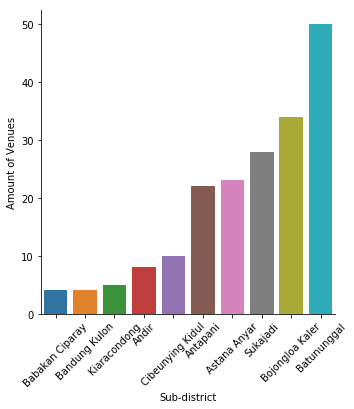

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
g = sns.catplot(x="Sub-district Name", 
                kind="count", data=filtered_venues, 
                order=filtered_venues.groupby('Sub-district Name')['Venue Category'].count().sort_values().index)
g.set_xticklabels(rotation=45)
g.set(xlabel='Sub-district', ylabel='Amount of Venues')
plt.show()

Batununggal seems to have the highest venues. Remember that the next step would be getting the 10 most common venue on each of those sub-district? And we eliminate that sub-district if there's no value on the 10 most common venue column. So for those sub-district that have less than 10 venues will be eliminated. Let's get the detailed amount first

In [16]:
filtered_venues.groupby('Sub-district Name')['Venue Category'].count().sort_values()

Sub-district Name
Babakan Ciparay      4
Bandung Kulon        4
Kiaracondong         5
Andir                8
Cibeunying Kidul    10
Antapani            22
Astana Anyar        23
Sukajadi            28
Bojongloa Kaler     34
Batununggal         50
Name: Venue Category, dtype: int64

Babakan Ciparay to Andir Sub-district will be eliminated from now on

In [17]:
eliminated_sub_district = ['Babakan Ciparay','Bandung Kulon','Kiaracondong','Andir']
filtered_venues = filtered_venues[~filtered_venues['Sub-district Name'].isin(eliminated_sub_district)]
df_merged = df_merged[~df_merged['Sub-district Name'].isin(eliminated_sub_district)]
print(filtered_venues.shape)
print(df_merged.shape)
df_merged.head()

(167, 7)
(6, 4)


,Sub-district Name,Density (Population/ha),Latitude,Longitude
9,Bojongloa Kaler,395,-6.931600,107.589000
3,Astana Anyar,276,-6.929900,107.599300
13,Cibeunying Kidul,271,-6.898446,107.648168
8,Batununggal,250,-6.919500,107.636300
26,Sukajadi,192,-6.890400,107.589000


#### 3.2.3 Find the 10 most common venue on each sub-district

In [18]:
onehot = pd.get_dummies(filtered_venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Sub-district Name'] = filtered_venues['Sub-district Name'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
grouped = onehot.groupby('Sub-district Name').mean().reset_index()
print(grouped.shape)
grouped.head(10)

(6, 80)


,Sub-district Name,Arcade,Art Gallery,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bed & Breakfast,Bookstore,Breakfast Spot,...,Sundanese Restaurant,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Udon Restaurant,University,Women's Store
0,Antapani,0.000000,0.00,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.045455,...,0.000000,0.045455,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00
1,Astana Anyar,0.043478,0.00,0.173913,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043478,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00
2,Batununggal,0.000000,0.02,0.020000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.02,0.000000,0.02,0.04,0.04,0.02,0.0,0.02
3,Bojongloa Kaler,0.029412,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,...,0.000000,0.029412,0.00,0.029412,0.00,0.00,0.00,0.00,0.0,0.00
4,Cibeunying Kidul,0.000000,0.00,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.1,0.00
5,Sukajadi,0.035714,0.00,0.000000,0.000000,0.035714,0.071429,0.035714,0.000000,0.000000,...,0.071429,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00


In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Sub-district Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Sub-district Name'] = grouped['Sub-district Name']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Sub-district Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antapani,Spa,Food Truck,Noodle House,Convenience Store,Field,Department Store,Dance Studio,Pharmacy,Cosmetics Shop,Salon / Barbershop
1,Astana Anyar,Asian Restaurant,Chinese Restaurant,Café,Noodle House,Arcade,Furniture / Home Store,Food & Drink Shop,Flea Market,Jewelry Store,Photography Lab
2,Batununggal,Coffee Shop,Japanese Restaurant,Toy / Game Store,Theme Park Ride / Attraction,Indonesian Restaurant,Shopping Mall,Fast Food Restaurant,Women's Store,Electronics Store,Food Court
3,Bojongloa Kaler,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Seafood Restaurant,Food Court,Ice Cream Shop,Multiplex,Korean Restaurant,Indonesian Restaurant,Gym / Fitness Center
4,Cibeunying Kidul,Convenience Store,Café,Noodle House,Snack Place,University,Asian Restaurant,Coffee Shop,Donut Shop,Dumpling Restaurant,Electronics Store
5,Sukajadi,Sundanese Restaurant,Noodle House,Bakery,Arcade,Multiplex,Market,Department Store,Juice Bar,Japanese Restaurant,Indonesian Restaurant


Here are the filtered venues

In [21]:
filtered_venues.head()

,Sub-district Name,Sub-district Latitude,Sub-district Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Antapani,-6.9186,107.66,Lotek Mas Umar,-6.915996,107.661316,Indonesian Restaurant
10,Antapani,-6.9186,107.66,Prima Rasa - Bakery & Pastry,-6.917296,107.656411,Bakery
11,Antapani,-6.9186,107.66,Warnet De Angel Net,-6.920980,107.657900,Internet Cafe
12,Antapani,-6.9186,107.66,apotek K24,-6.914447,107.663440,Pharmacy
13,Antapani,-6.9186,107.66,Baso Spiderman,-6.917560,107.661190,Noodle House


Here are our best sub-district

In [22]:
df_merged

,Sub-district Name,Density (Population/ha),Latitude,Longitude
9,Bojongloa Kaler,395,-6.931600,107.589000
3,Astana Anyar,276,-6.929900,107.599300
13,Cibeunying Kidul,271,-6.898446,107.648168
8,Batununggal,250,-6.919500,107.636300
26,Sukajadi,192,-6.890400,107.589000
1,Antapani,185,-6.918600,107.660000


We get our best sub-district to become our choices on choosing sub-district and its venues available in those area. The next step will be visualizing these sub-district and venues on the map to see on their locations

## 4. Results  
After the above analysis, now let's take a look on the map which sub-district are our best candidates

### 4.1 Visualizing Sub-district and Venues on Map

In [23]:
bandung_lat = -6.9175
bandung_lon = 107.64
# create map of Bandung using latitude and longitude values
map = folium.Map(location=[bandung_lat, bandung_lon], zoom_start=13)

# add venues markers to map
for lat, lng, sub_district in zip(filtered_venues['Venue Latitude'], filtered_venues['Venue Longitude'], filtered_venues['Venue']):    
    label = '{}'.format(sub_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map)

# add sub-district markers to map
for lat, lng, sub_district in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Sub-district Name']):
    label = '{}'.format(sub_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map)
map

So that's everything we did so far. We got the 6 sub-districts which are our best candidates, the amount of venue, and most common venue on sub-district. Now, we can just decide which sub-district we want to choose and build the apartment right away. But I'd like to cluster these 6 sub-districts using K-Means Clustering.

### 4.2 Clustering Sub-district
Next, I'd try to cluster these sub-districts to see which sub-districts are similar in that cluster. That way, we could choose between sub-districts that are similar, instead of choosing one of the six sub-districts. I'll divide it into 3 clusters  
The features I use for the clustering would be the venues proportion, population density, latitude, and longitude. But before we cluster these sub-districts, we need to rescale the features first

#### 4.2.1 Rescaling Features

In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
grouped_new_features = grouped.merge(df_merged,on='Sub-district Name')
scaled_grouped = scaler.fit_transform(grouped_new_features.drop('Sub-district Name',axis=1))

#### 4.2.2 Clustering

In [25]:
from sklearn.cluster import KMeans
k = 3 # number of clusters
new_grouped = grouped_new_features.drop('Sub-district Name',axis=1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_grouped)

#### 4.2.3 Clustering Results

In [26]:
new_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
clustered = new_grouped
clustered = pd.concat([grouped['Sub-district Name'], clustered], axis=1, sort=False)
clustered = clustered[['Sub-district Name','Cluster Labels']]
clustered['Cluster Labels'] = clustered['Cluster Labels'].astype('int32')
clustered = clustered.merge(df_merged,on='Sub-district Name')
clustered

,Sub-district Name,Cluster Labels,Density (Population/ha),Latitude,Longitude
0,Antapani,0,185,-6.918600,107.660000
1,Astana Anyar,2,276,-6.929900,107.599300
2,Batununggal,1,250,-6.919500,107.636300
3,Bojongloa Kaler,1,395,-6.931600,107.589000
4,Cibeunying Kidul,2,271,-6.898446,107.648168
5,Sukajadi,0,192,-6.890400,107.589000


Now the sub-district already clustered into 3 clusters, we'll now see how it looks like on the map

In [27]:
bandung_lat = -6.9175
bandung_lon = 107.64
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[bandung_lat, bandung_lon], zoom_start=13)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['black','blue','green']

# add venues markers to map
for lat, lng, sub_district in zip(filtered_venues['Venue Latitude'], filtered_venues['Venue Longitude'], filtered_venues['Venue']):    
    label = '{}'.format(sub_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)

# add sub-district markers to map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered['Latitude'], clustered['Longitude'], clustered['Sub-district Name'], clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Discussion  
From the analysis I did, I filtered the sub-district based on their population density and venues. From a total of 30 sub-districts, there are 6 best sub-districts to become our best consideration when it comes to building an apartment. Of course, there could be added more features such as lands that are on sale, land pricing, specific transportation available in the nearby area, and the government's permission to build an apartment.  

After I choose these candidates, I used K-Means Clustering Algorithm to see similarities between sub-districts based on its venues. For the cluster numbers, I choose 3 clusters just because I'd like to see the possible pair between sub-districts. Fortunately, there are 3 clusters with each cluster exactly have one pair. This would be an easier choice to build an apartment rather than choosing between 6 different sub-districts. These clusters meaning that inside on one cluster, 2 sub-districts are similar based on its venues, population density, latitude, and longitude.

## 6. Conclusion  
If we build an apartment in these locations, it could suppress the population density problem that will occur in the future. Not only considering population density, these sub-district at least had 10 venues available nearby for 750 meters(according to Foursquare API) that at least these sub-districts are sufficient enough to fulfill the resident's needs. Hopefully, this insight can give you so many meaningful knowledge on finding the best location to build an apartment. Thank you for checking out on my notebook.

## 7. References  
 - [1] [Indonesia Population](http://worldpopulationreview.com/countries/indonesia-population/)  
 - [2] [Bandung City Population](http://worldpopulationreview.com/world-cities/bandung-population/)  
 - [3] [Foursquare API for Developers](https://foursquare.com/developers/apps)  
 - [4] [Open Data Bandung City](http://data.bandung.go.id/)  
 - [5] [DistancesFrom](https://www.distancesfrom.com/Latitude-Longitude.aspx)